# CNN 합성곱 신경망


In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
from PIL import Image

In [106]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # Add a channels dimension
# x_train = x_train[..., tf.newaxis].astype("float32")
# x_test = x_test[..., tf.newaxis].astype("float32")
x_train.shape

(60000, 28, 28)

In [93]:
img = Image.open("C:\\Users\\HP\\Desktop\\workspace\\MetaversAcademy\\Missions\\Apple_project\\unknown.jpg")
img = np.array(img.resize((28, 28)))
img.shape

(28, 28, 3)

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(29400, 28, 28, 1) 29400
(12600, 28, 28, 1) 12600


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [96]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [97]:
history = model.fit(x_train, y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
919/919 [==============================] - 5s 5ms/step - loss: 0.3784 - acc: 0.8813 - val_loss: 0.1134 - val_acc: 0.9642
Epoch 2/5
919/919 [==============================] - 4s 4ms/step - loss: 0.0937 - acc: 0.9704 - val_loss: 0.0733 - val_acc: 0.9771
Epoch 3/5
919/919 [==============================] - 4s 4ms/step - loss: 0.0616 - acc: 0.9808 - val_loss: 0.0751 - val_acc: 0.9777
Epoch 4/5
919/919 [==============================] - 4s 4ms/step - loss: 0.0466 - acc: 0.9851 - val_loss: 0.0559 - val_acc: 0.9828
Epoch 5/5
919/919 [==============================] - 4s 4ms/step - loss: 0.0367 - acc: 0.9875 - val_loss: 0.0581 - val_acc: 0.9825
313/313 - 1s - loss: 0.0420 - acc: 0.9854 - 505ms/epoch - 2ms/step


[0.04198363423347473, 0.9854000210762024]

In [98]:
get_layer_names = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

In [99]:
print('층 이름: ', get_layer_names)
print('출력 층 이름: ', get_output)

층 이름:  ['conv2d_37', 'conv2d_38', 'max_pooling2d_18', 'conv2d_39', 'conv2d_40', 'max_pooling2d_19', 'conv2d_41', 'conv2d_42', 'max_pooling2d_20', 'flatten_8', 'dense_16', 'dense_17']
출력 층 이름:  [<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_37')>, <KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_38')>, <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_18')>, <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_39')>, <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_40')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_19')>, <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_41')>, <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_42')>, <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_20')>, <KerasTensor: sh

In [100]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [101]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [105]:
test_img = np.expand_dims(img, axis = 0)
test_img.shape
feature_map = visual_model.predict(test_img)

ValueError: in user code:

    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_4" (type Functional).
    
    Input 0 of layer "conv2d_37" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 28, 28, 3)
    
    Call arguments received by layer "model_4" (type Functional):
      • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=uint8)
      • training=False
      • mask=None


In [103]:
feature_map[0][::1].shape

(28, 28, 32)

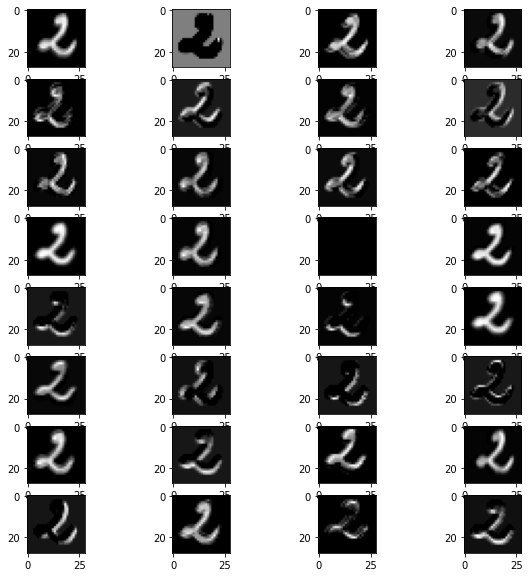

In [76]:
plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(feature_map[0][:,:,i], cmap='gray')
plt.show()

1/1 [==============================] - 0s 57ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_8536\2067030195.py:20: RuntimeWarning: invalid value encountered in divide
  x -= x.mean(); x /= x.std()


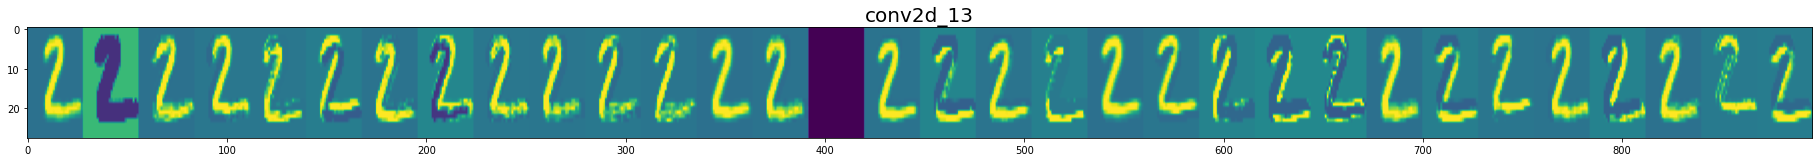

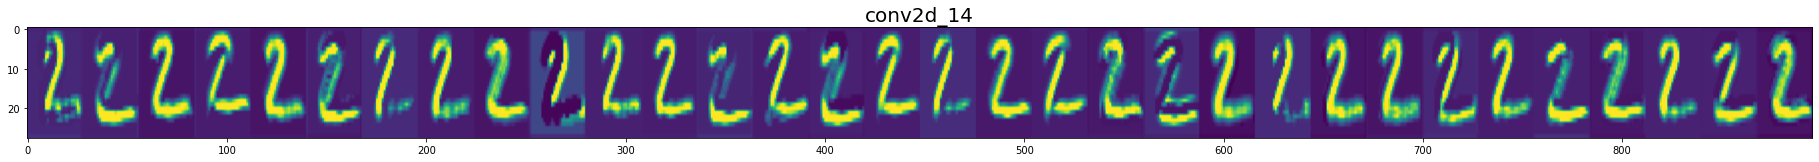

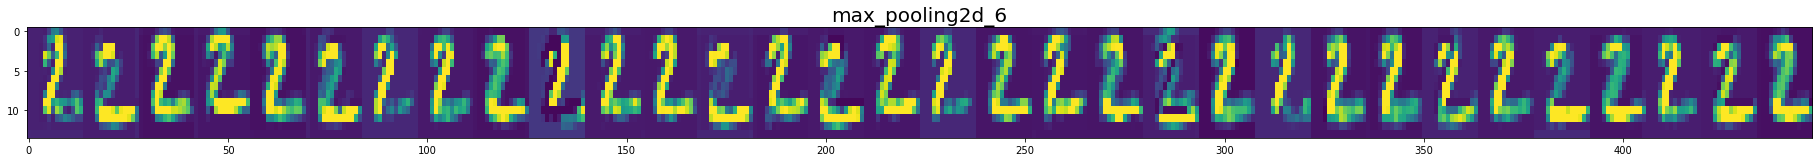

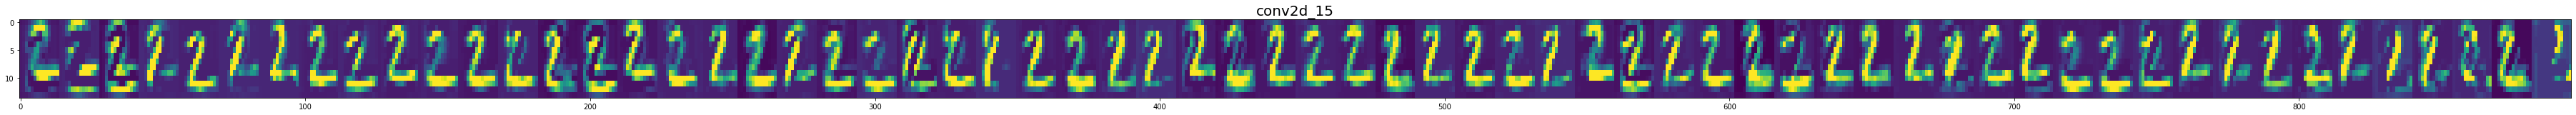

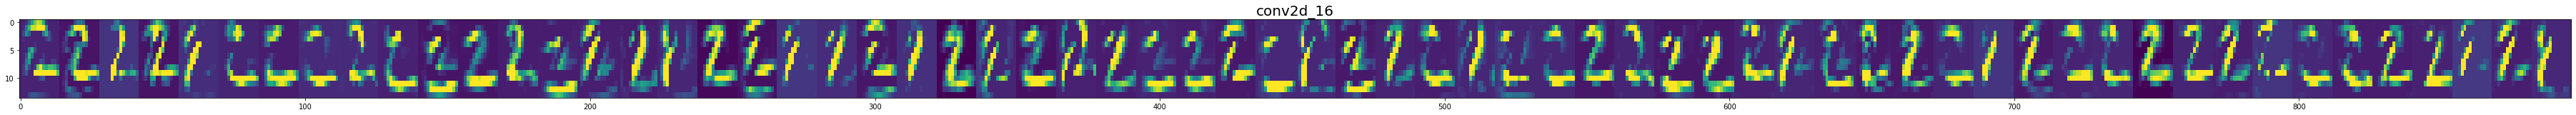

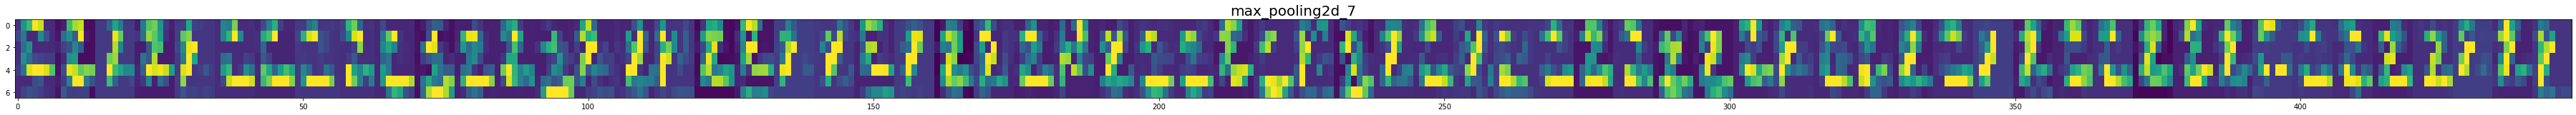

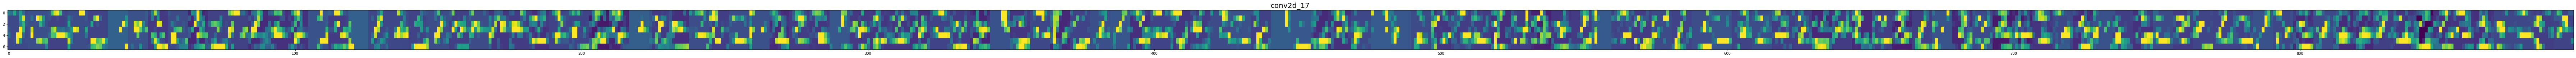

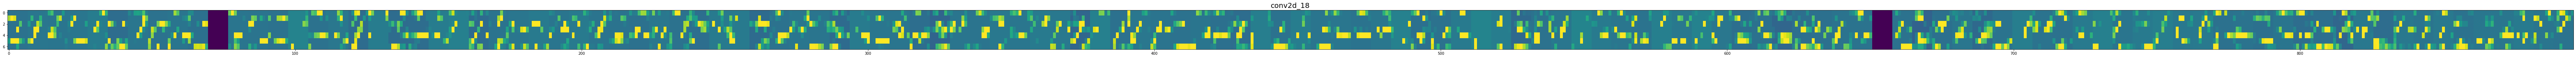

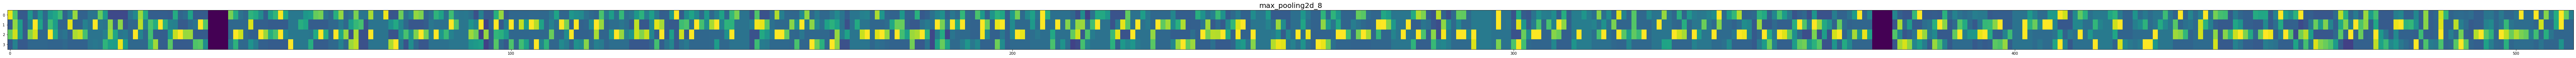

In [30]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_names, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')